In [2]:
from pathlib import Path
import os
import matplotlib.pyplot as plt

## Tutorial Link
https://pymupdf.readthedocs.io/en/latest/tutorial.html

## Profile / resume data extraction from pdf

In [3]:
import fitz #pymupdf to read pdfs

In [4]:
def text_from_pdf(filepath):
    doc = fitz.open(filepath)
    combined_text = ""
    for page in doc:  # iterate the document pages
        text = page.get_text()  # get plain text (is in UTF-8)
        combined_text += text  # write text of page
    return combined_text

In [5]:
filepath = Path("data/example_resume.pdf")

In [6]:
doc = fitz.open(filepath)

In [7]:
doc.metadata

{'format': 'PDF 1.4',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'Apache FOP Version 2.2',
 'producer': 'Apache FOP Version 2.2',
 'creationDate': 'D:20230507120855Z',
 'modDate': '',
 'trapped': '',
 'encryption': None}

In [8]:
doc.page_count

6

out = open(f"./{filepath.stem}.txt", "wb")  # open text output
for page in doc:  # iterate the document pages
    text = page.get_text().encode("utf8")  # get plain text (is in UTF-8)
    out.write(text)  # write text of page
    out.write(bytes((12,)))  # write page delimiter (form feed 0x0C)
out.close()

In [9]:
combined_text = ""
for page in doc:  # iterate the document pages
    text = page.get_text()  # get plain text (is in UTF-8)
    combined_text += text  # write text of page

In [10]:
#Printing first and last 1000 characters to ensure load is correct
print(combined_text[0:1000])
print(combined_text[-1000:])

Zaishan Weng
linkedin.com/in/zaishan-weng
https://zs-weng.github.io/blog/
Summary
A techno-functional consultant and solutions architect with over 14 years of experience leading strategic digital
transformation, data analytics and data science initiatives in the retail, government, health & security and
restaurant industries. A dynamic & passionate professional who specializes in driving innovation, delivering large
and complex projects, and advising senior executives on leveraging technology to drive business outcomes. A
 data scientist/engineer with proven track record in deploying impactful and productive AI products.
Areas of expertise & Specialty include:
• Drive innovation & change management
• Develop and execute AI strategy
• Demonstrate business goals & ROI
• Lead cross functional team
• Orchestrate complex large-scale projects
 • Architect data analytics ecosystem
Blog: https://zs-weng.github.io/blog/data-ai-blog.html
Experience
Data Analytics and AI Lead
IBM
Nov 2020 - Prese

## Extracting job details from Linkedin Page

In [11]:
import requests
from bs4 import BeautifulSoup

In [12]:
def extract_linkedin_job_details(job_url):
    
    job_dict = {}
    response = requests.get(job_url)
    soup = BeautifulSoup(response.text, "html.parser")

#     job_title = soup.find("h1", class_="topcard__title").text.strip()
#     company_name = soup.find("a", class_="topcard__org-name-link").text.strip()
#     location = soup.find("span", class_="topcard__flavor topcard__flavor--bullet").text.strip()
#     job_description = soup.find("div", class_="show-more-less-html__markup").text.strip()
    
    job_dict["job_title"] = soup.find("h1", class_="topcard__title").text.strip()
    job_dict["company_name"] = soup.find("a", class_="topcard__org-name-link").text.strip()
    job_dict["location"] = soup.find("span", class_="topcard__flavor topcard__flavor--bullet").text.strip()
    job_dict["job_description"] = soup.find("div", class_="show-more-less-html__markup").text.strip()
    
    return job_dict

#     print("Job Title:", job_title)
#     print("Company Name:", company_name)
#     print("Location:", location)
#     print("Job Description:", job_description)


In [13]:
# Replace with the job listing URL you want to scrape
list_job_url = ["https://www.linkedin.com/jobs/view/3559670080/"]
list_job_details = []

for job_url in list_job_url:
    job_dict = extract_linkedin_job_details(job_url)
    list_job_details.append(job_dict)

In [14]:
list_job_details[0]

{'job_title': 'Director, Data Science (Engagement)',
 'company_name': 'EVYD Technology',
 'location': 'Singapore, Singapore',
 'job_description': "EVYD Technology is a healthtech company that is building a future where everyone can access better health by integrating technology and medical intelligence.Reporting to: Head, MedicalIn BriefEVYD Technology is building a future where everyone can access better healthcare. As a Director in Data Science for engagement analytics, you will use your technical expertise to grow and develop a team of data scientists working on data processing, mining, analysis, and modelling. You will work together with our medical advisory team to derive insights to increase our users' adherence to prescribed digital routines and improve their health.Key DeliverablesPlan and implement a strategy to build out a world-class data science function for EVYD.\u202f Develop and build data analytics and machine learning models to incorporate into EVYD's product suite and

## Basic keyword analysis contained within job description

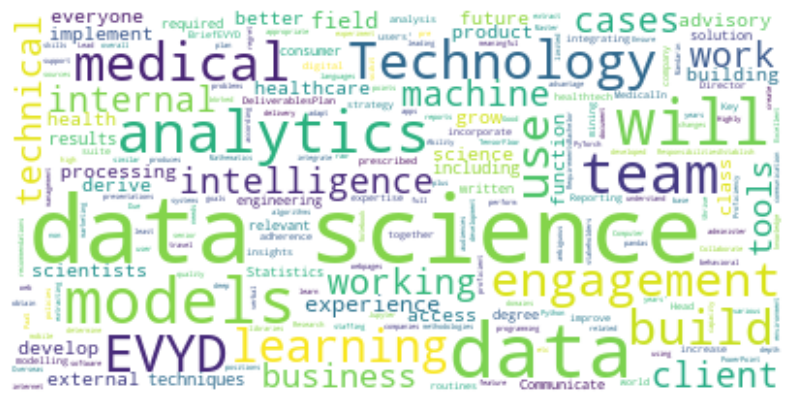

In [15]:
from wordcloud import WordCloud, STOPWORDS

text_4_wordcloud = list_job_details[0]['job_description']

stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_4_wordcloud)

# Display the generated image:
plt.figure(figsize=[10,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Use Beautiful Soup / Selenium or API Call to search internet about the company from the company name

## Using TF IDF to compare similarity between job posted and resume

In [16]:
#importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import string

In [25]:
#loading spacy model
nlp = spacy.load('en_core_web_sm')

#preprocessing text
def preprocess(text):
    #convert to lowercase
    text = text.lower()
    #remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    #tokenize into words
    doc = nlp(text)
    words = [token.text for token in doc]
    #remove stop words
    words = [word for word in words if not nlp.vocab[word].is_stop]
    #removing special characters
    words = [token.text for token in doc if not token.is_punct]
    #join words back into text and removing special unicode characters
    text = ' '.join(word for word in words if word.isalnum())
    return text

In [26]:
#defining books
jd = list_job_details[0]['job_description']
resume = combined_text

jd = preprocess(jd)
resume = preprocess(resume)

In [18]:
#transforming books into tf-idf vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([jd, resume])

In [19]:
#computing cosine similarity between books
similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print(f"Cosine similarity: {similarity[0][0]:.4f}")

Cosine similarity: 0.6145


## Use LLMs to identify amount of fit and gaps between job description and resume profile

In [20]:
mbti_types = [
    "INTJ",
    "INTP",
    "ENTJ",
    "ENTP",
    "INFJ",
    "INFP",
    "ENFP",
    "ESFP",
    "ISTP",
    "ISFP",
    "ESTP",
    "ESFJ",
    "ESTJ",
    "ISFJ",
    "ESFJ",
    "ENFJ"
]

In [23]:
for mymbti_type in mbti_types:
    profilepath = Path(f"data/mbti/{mymbti_type}.pdf")
    mbti_details = text_from_pdf(profilepath)
    

Myers-Briggs Type indicaTor (MBTI®)
INTJ 
  (Introversion, Intuition, Thinking, Judging)
The above f
Myers-Briggs Type indicaTor (MBTI®)
INTP
  (Introversion, Intuition, Thinking, Perceiving)
The above
Myers-Briggs Type indicaTor (MBTI®)
ENTJ 
(Extroversion, Intuition, Thinking, Judging)
The above fou
Myers-Briggs Type indicaTor (MBTI®)
ENTP 
 (Extroversion, Intuition, Thinking, Perceiving)
The above
Myers-Briggs Type indicaTor (MBTI®)
INFJ 
    (Introversion, Intuition, Feeling, Judging)
The above 
Myers-Briggs Type indicaTor (MBTI®)
INFP 
    (Introversion, Intuition, Feeling, Perceiving)
The abo
Myers-Briggs Type indicaTor (MBTI®)
ENFP 
(Extroversion, Intuition, Feeling, Perceiving)
The above f
Myers-Briggs Type indicaTor (MBTI®)
ESFP 
    (Extraversion, Sensing, Feeling, Perceiving)
The above
Myers-Briggs Type indicaTor (MBTI®)
ISTP
 (Introversion, Sensing, Thinking, Perceiving)
The above fo
Myers-Briggs Type indicaTor (MBTI®)
ISFP
    (Introversion, Sensing, Feeling, Perceiving)
T

## Semantic Search from Interview Stories to identify the top content for each of the requirement

### Sentence Bert Implementation 

### Check out on other tools

## Internal PDF Search records

## Comparing if the job is suitable for a particular personality profile: Use 2 descriptions of MBTI as example